Task 2: Линейная диаграмма со стилями

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sqlite3 import connect

In [3]:
from google.colab import drive   
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Установите соединение с базой данных

In [4]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

1) Анализируйте только пользователей, а не администраторов.
2) Используйте фильтр status = 'ready' для коммитов.
3) Анализируйте только те даты, когда были зафиксированы и просмотры, и коммиты

In [5]:
dataset = pd.read_sql('''
select p.data,count_view as views,count_commits as commits
from
   ( SELECT
        date(datetime) as data,count(*) as count_view
    FROM
        pageviews
    WHERE
        uid like '%user%'
        group by  date(datetime) ) p
      join
   (SELECT
        date(timestamp) as data,count(*) count_commits
    FROM
        checker
    WHERE
        uid like '%user%' and status = 'ready'
        group by date(timestamp)  ) c 
        on p.data=c.data
        order by p.data
''', con, index_col='data', parse_dates=['datetime','timestamp'])
dataset

,views,commits
data,,
2020-04-17,1,13
2020-04-18,23,39
2020-04-19,15,18
2020-04-21,3,13
2020-04-22,1,16
2020-04-23,5,24
2020-04-25,1,57
2020-04-26,8,137
2020-04-28,2,3


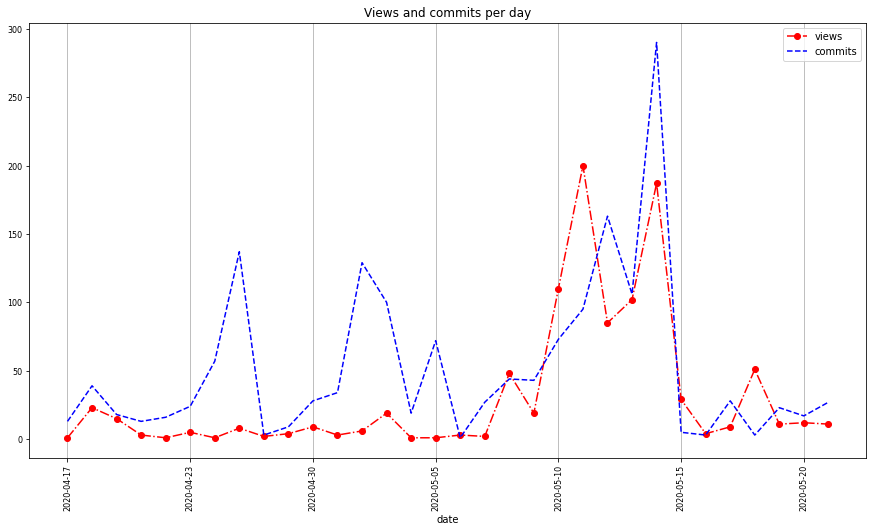

In [6]:
dataset.plot(
            y = ['views', 'commits'],
             color = ['red', 'blue'],
             style = ["o-.", "--"],
             figsize = (15,8), rot=90, fontsize=8,
             title="Views and commits per day",
             xlabel='date'
)
plt.grid(axis='x')
plt.show()

In [8]:
con.close()

In [9]:
#@markdown **Сколько раз количество просмотров превышало 150??**

Ответ:2